In [1]:
import pandas as pd
import numpy as np

In [3]:
ds = pd.read_csv("/content/dataset.csv")
sd = pd.read_csv("/content/symptom_Description.csv")
sp = pd.read_csv("/content/symptom_precaution.csv")
ss = pd.read_csv("/content/Symptom-severity.csv")

In [4]:
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Diseases = ds["Disease"].unique()
Diseases

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
Symptoms = ss["Symptom"].unique()
Symptoms

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [7]:
col = []
for i in ds.columns:
  if i != "Disease": 
    col.append(i)

def symptomslist(x):
  l = []
  for i in col:
    if type(x[i]) == str:
      l.append(x[i].strip())
  return l

ds["Symptoms_List"] = ds.apply(symptomslist,axis = 1)
ds1 = ds[["Disease","Symptoms_List"]]

In [8]:
ds1

,Disease,Symptoms_List
0,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,Fungal infection,"[skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,"[itching, nodal_skin_eruptions, dischromic _pa..."
3,Fungal infection,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions]"
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,"[vomiting, headache, nausea, spinning_movement..."
4916,Acne,"[skin_rash, pus_filled_pimples, blackheads, sc..."
4917,Urinary tract infection,"[burning_micturition, bladder_discomfort, foul..."
4918,Psoriasis,"[skin_rash, joint_pain, skin_peeling, silver_l..."


In [9]:
def bin(row,symptom):
  if symptom in row["Symptoms_List"]:
    return(1)

  else:
    return(0)

for i in Symptoms:
  ds1[i] = ds1.apply(lambda row:bin(row,i),axis = 1)

ds1 = ds1.drop("Symptoms_List",axis = 1)
ds1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
x = ds1.drop("Disease", axis = 1)
y = ds1.Disease

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y)
DT = DecisionTreeClassifier(criterion = "entropy")
DT.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [13]:
ypredicted = DT.predict(xtest)
ypredicted

array(['Dimorphic hemmorhoids(piles)', 'Hyperthyroidism', 'Tuberculosis',
       ..., 'Allergy', 'Chronic cholestasis', 'Hepatitis E'], dtype=object)

In [14]:
ytest

3021    Dimorphic hemmorhoids(piles)
3230                 Hyperthyroidism
2308                    Tuberculosis
3037             Chronic cholestasis
4118                         Typhoid
                    ...             
1046                     Hepatitis D
2585                            GERD
2064                         Allergy
854              Chronic cholestasis
1058                     Hepatitis E
Name: Disease, Length: 1230, dtype: object

In [15]:
accuracy_score(y_true = ytest, y_pred = ypredicted)

1.0

[Text(0.5, 0.9, 'fatigue <= 0.5\nentropy = 5.355\nsamples = 3690\nvalue = [96, 94, 87, 96, 89, 91, 96, 91, 79, 92, 97, 96\n93, 89, 88, 82, 85, 95, 80, 87, 95, 85, 84, 86\n93, 90, 98, 82, 90, 90, 84, 91, 86, 91, 98, 91\n91, 92, 90, 86, 94]\nclass = Common Cold'),
 Text(0.25, 0.7, 'vomiting <= 0.5\nentropy = 4.795\nsamples = 2227\nvalue = [96, 94, 87, 96, 89, 91, 11, 91, 5, 92, 4, 6, 5\n89, 88, 82, 85, 95, 80, 5, 4, 4, 4, 86, 3, 5\n9, 82, 6, 90, 84, 91, 86, 91, 6, 91, 6, 0, 90\n4, 94]\nclass = Fungal infection'),
 Text(0.125, 0.5, 'skin_rash <= 0.5\nentropy = 4.255\nsamples = 1349\nvalue = [4, 94, 87, 5, 89, 91, 11, 91, 5, 5, 4, 0, 5\n89, 88, 82, 9, 10, 6, 5, 4, 0, 0, 86, 3, 0\n9, 82, 0, 5, 84, 91, 10, 1, 6, 91, 0, 0, 90\n4, 3]\nclass = Allergy'),
 Text(0.0625, 0.3, 'neck_pain <= 0.5\nentropy = 3.942\nsamples = 940\nvalue = [4, 94, 3, 5, 89, 91, 11, 91, 0, 5, 4, 0, 5\n89, 9, 8, 9, 10, 6, 5, 4, 0, 0, 86, 3, 0, 9\n2, 0, 5, 84, 91, 10, 1, 6, 4, 0, 0, 90, 4, 3]\nclass = Allergy'),
 Text(0.03

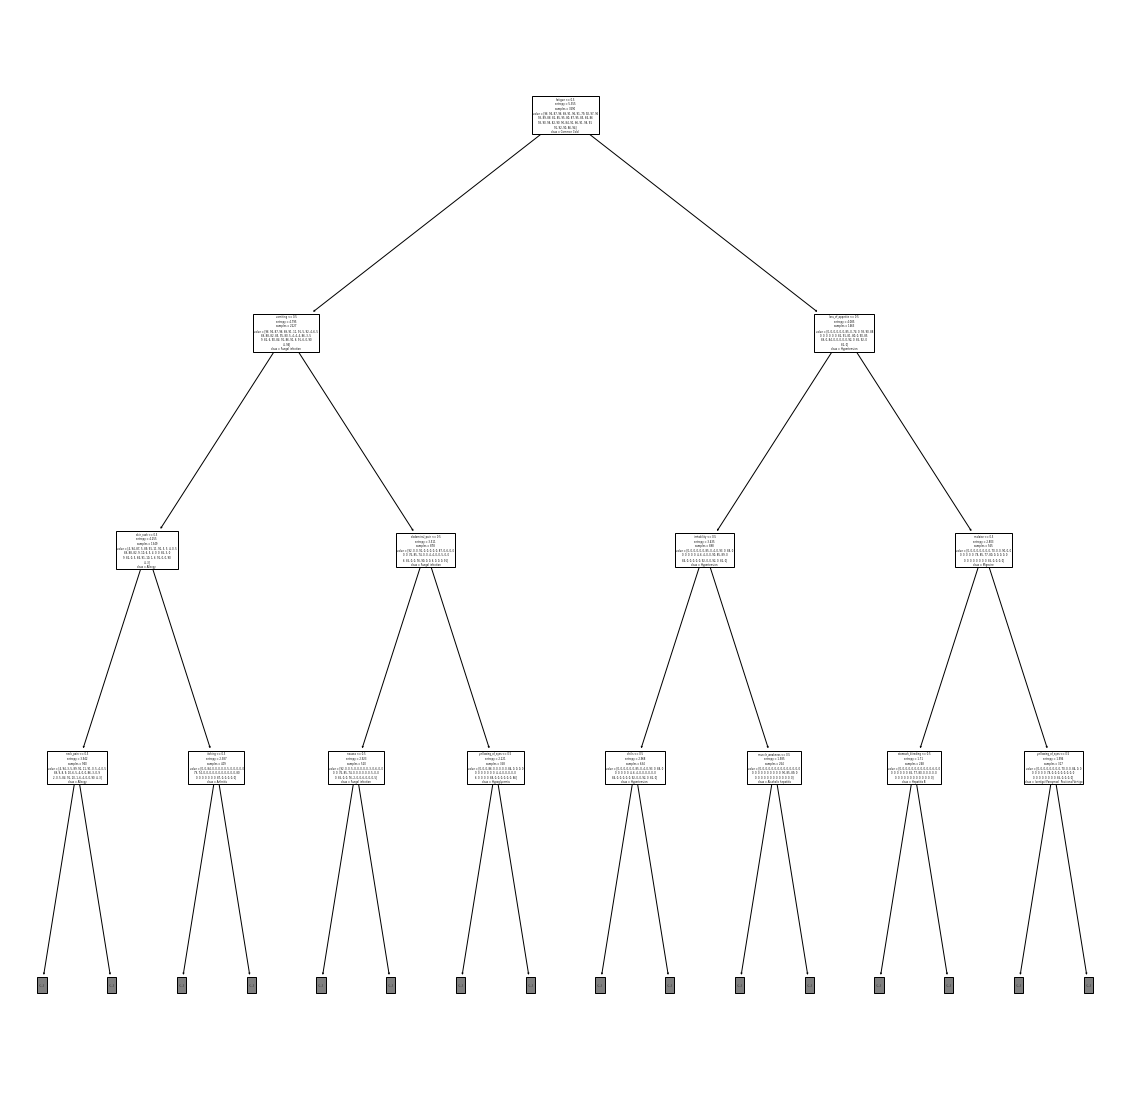

In [22]:
plt.figure(figsize = (20,20))
plot_tree(DT,feature_names = Symptoms, class_names = Diseases, max_depth = 3)

In [ ]:
import pickle
pickle.dump(DT,open("DecisionTree.pkl","wb"))